# **FIND-S ALGFORITHM**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Find_S (1).csv")
df

,Example,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,1,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,2,Sunny,Warm,High,Strong,Warm,Same,Yes
2,3,Rainy,Cold,High,Strong,Warm,Change,No
3,4,Sunny,Warm,High,Strong,Cool,Change,Yes


In [ ]:
t=np.array(df)[:,-1]
#print(t)
a=np.array(df)[:,0:6]
#print(a)
h=pd.Series(["@"]*a.shape[1])
for i in range(a.shape[0]):
  for j in range(a.shape[1]):
    if t[i]=='Yes':
      if h[j]=="@" and a[i][j]!="@":
        h[j]=a[i][j]
      if h[j]!=a[i][j]:
        h[j]="?"
  print(np.array(h))

[1 'Sunny' 'Warm' 'Normal' 'Strong' 'Warm']
['?' 'Sunny' 'Warm' '?' 'Strong' 'Warm']
['?' 'Sunny' 'Warm' '?' 'Strong' 'Warm']
['?' 'Sunny' 'Warm' '?' 'Strong' '?']


# **Candidate-elimination Algorithm**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Find_S (1).csv')
df.set_index('Example',inplace=True)
m=df.shape[0]
n=df.shape[1]
df

,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
Example,,,,,,,
1,Sunny,Warm,Normal,Strong,Warm,Same,Yes
2,Sunny,Warm,High,Strong,Warm,Same,Yes
3,Rainy,Cold,High,Strong,Warm,Change,No
4,Sunny,Warm,High,Strong,Cool,Change,Yes


In [ ]:
def all(d):
    d=set(d)
    if len(d)==1:
        return True
def rem(d,s):
    c=0
    for i in range(len(d)):
        if(d[i]==s[i] or (d[i]=='?' and s[i]!='?') ):
                c+=1;
        else:
            return False
    return True
g=[['?','?','?','?','?','?']]
s=['0','0','0','0','0','0']
for i in range(1,m+1):
    d=np.array(df.loc[i])
    if(d[-1]=='Yes'):
        for k in range(len(s)):
            if(s[k]!=d[k] and i==1):
                s[k]=d[k]
            elif(s[k]!=d[k]):
                s[k]='?'
    elif(d[-1]=='No'):
        for i in range(len(s)):
            o=[]
            if(s[i]!=d[i] and s[i]!='?'):
                for p in range(len(s)):
                    if(p==i):
                        o.append(s[i])
                    else:
                        o.append('?')
                g.append(o)
ls = g.copy()
for d in g:
    if all(d):
       ls.remove(d)
    elif rem(d,s) == False:
        ls.remove(d)
    else:
        for i in range(len(s)):
            if(s[i] not in d):
                a=d.copy()
                a[i]=s[i]
                ls.append(a)
d=[]
for i in ls:
    if i not in d:
        d.append(i)
d.append(s)
print("The version space for the given problem is")
print(d)

The version space for the given problem is
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['Sunny', 'Warm', '?', '?', '?', '?'], ['Sunny', '?', '?', 'Strong', '?', '?'], ['?', 'Warm', '?', 'Strong', '?', '?'], ['Sunny', 'Warm', '?', 'Strong', '?', '?']]


# **Naive-Bayesian**

In [15]:
import pandas as pd
import numpy as np
import math
data= pd.read_csv('/content/play_tennis.csv')
data

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [21]:
train = data.loc[:math.floor(len(data)*0.6)-1]
test = data.iloc[math.floor(len(data)*0.6):]
test1=test.copy()
train


,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No


In [33]:
x = train['play'].value_counts()
pyes = x['Yes']/len(train['play'])
pno = x['No']/len(train['play'])
columns = test.columns
colvalues={}
for i in columns:
    colvalues[i] = list(set(train[i]))
print("colvalues",colvalues)
calc = {}
d = {}
yes = 0
no = 0
for i in columns:
    for j in colvalues[i]:
        yes = 0
        no = 0
        d = {}
        for k in range(len(train)):
            if(train[i][k] == j)and (train['play'][k]=='Yes'):
                yes += 1
            elif(train[i][k] == j)and (train['play'][k]=='No'):
                no += 1
#         print(yes,no)
        d['Yes'] = yes/x['Yes']
        d['No'] = no/x['No']
        calc[j] = d
print(calc)
p=[]
for j in range(len(test)):
    l = test.iloc[j].values
    print("l=",l)
    y = 1
    n = 1
    for i in l:
        i = i.strip()
        y *= calc[i]['Yes']
        n *= calc[i]['No']
    y *= pyes
    n *= pno
    if(y>n):
        print("Yes")
        p.append("Yes")
    else:
        print("No")
        p.append("No")

colvalues {'outlook': ['Overcast', 'Rain', 'Sunny'], 'temp': ['Hot', 'Mild', 'Cool'], 'humidity': ['Normal', 'High'], 'wind': ['Strong', 'Weak'], 'play': ['No', 'Yes']}
{'Overcast': {'Yes': 0.5, 'No': 0.0}, 'Rain': {'Yes': 0.5, 'No': 0.25}, 'Sunny': {'Yes': 0.0, 'No': 0.75}, 'Hot': {'Yes': 0.25, 'No': 0.5}, 'Mild': {'Yes': 0.25, 'No': 0.25}, 'Cool': {'Yes': 0.5, 'No': 0.25}, 'Normal': {'Yes': 0.5, 'No': 0.25}, 'High': {'Yes': 0.5, 'No': 0.75}, 'Strong': {'Yes': 0.25, 'No': 0.5}, 'Weak': {'Yes': 0.75, 'No': 0.5}, 'No': {'Yes': 0.0, 'No': 1.0}, 'Yes': {'Yes': 1.0, 'No': 0.0}}
l= ['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
No
l= ['Rain' 'Mild' 'Normal' 'Weak' 'Yes']
Yes
l= ['Sunny' 'Mild' 'Normal' 'Strong' 'Yes']
No
l= ['Overcast' 'Mild' 'High' 'Strong' 'Yes']
Yes
l= ['Overcast' 'Hot' 'Normal' 'Weak' 'Yes']
Yes
l= ['Rain' 'Mild' 'High' 'Strong' 'No']
No


In [34]:
print(test)

     outlook  temp humidity    wind play
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No


In [30]:
print(x)
print(pyes)
print(pno)
print(columns)

No     4
Yes    4
Name: play, dtype: int64
0.5
0.5
Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [39]:
test1.rename(columns={'play':'Actual Lable'},inplace=True)
test1['Predicted']=p
test1
l=list(test1['Actual Lable'])
a=list(test1['Predicted'])
print(test1)
c=0
r=len(l)
for i in range(len(l)):
  if(l[i]==a[i]):
    c=c+1
accuracy=c/r
print("accuracy is ",accuracy*100)

     outlook  temp humidity    wind Actual Lable Predicted
8      Sunny  Cool   Normal    Weak          Yes        No
9       Rain  Mild   Normal    Weak          Yes       Yes
10     Sunny  Mild   Normal  Strong          Yes        No
11  Overcast  Mild     High  Strong          Yes       Yes
12  Overcast   Hot   Normal    Weak          Yes       Yes
13      Rain  Mild     High  Strong           No        No
accuracy is  66.66666666666666


# **TEXT_CLASSIFIEr**

In [11]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('/content/text_classification.csv')
data1

,Text,Label
0,I love this sandwich,pos
1,this is an amazing place,pos
2,I feel very good about these beers,pos
3,this is my best work,pos
4,what an awesome view,pos
5,I do not like this restaurant,neg
6,I am tired of this stuff,neg
7,I can't deal with this,neg
8,he is my sworn enemy,neg
9,my boss is horrible,neg


In [12]:
import math
data=data1.loc[:math.floor(len(data1)*0.6)-1]
test=data1.loc[math.floor(len(data1)*0.6):]
test1=test.copy()
data
test1

,Text,Label
10,this is an awesome place,pos
11,I donot like the taste of this juice,neg
12,I love to dance,pos
13,I am sick and tired of this place,neg
14,what a great holiday,pos
15,that is a bad locality to stay,neg
16,we will have good fun tomorrow,pos
17,I went to my enemy's house today,neg


In [13]:
new=[]
for i in data['Text']:
  l=i.split(' ')
  print(l)
  new.extend(l)

['I', 'love', 'this', 'sandwich']
['this', 'is', 'an', 'amazing', 'place']
['I', 'feel', 'very', 'good', 'about', 'these', 'beers']
['this', 'is', 'my', 'best', 'work']
['what', 'an', 'awesome', 'view']
['I', 'do', 'not', 'like', 'this', 'restaurant']
['I', 'am', 'tired', 'of', 'this', 'stuff']
['I', "can't", 'deal', 'with', 'this']
['he', 'is', 'my', 'sworn', 'enemy']
['my', 'boss', 'is', 'horrible']


In [14]:
neg=[]
pos=[]
p=data[data['Label']=='pos']
print(p)
n=data[data['Label']=='neg']
print(n)
for i in n['Text']:
  l=i.split(' ')
  #print(l)
  neg.extend(l)
print(neg)
for i in p['Text']:
  l=i.split(' ')
  #print(l)
  pos.extend(l)
print(pos)
n_p=len(pos)
voc=pos+neg
#print(voc)
voc=set(voc)
#print(voc)
voc_t=len(voc)
voc_p=len(set(pos))
n_n=len(neg)
voc_n=len(set(neg))

                                 Text Label
0                I love this sandwich   pos
1            this is an amazing place   pos
2  I feel very good about these beers   pos
3                this is my best work   pos
4                what an awesome view   pos
                            Text Label
5  I do not like this restaurant   neg
6       I am tired of this stuff   neg
7         I can't deal with this   neg
8           he is my sworn enemy   neg
9            my boss is horrible   neg
['I', 'do', 'not', 'like', 'this', 'restaurant', 'I', 'am', 'tired', 'of', 'this', 'stuff', 'I', "can't", 'deal', 'with', 'this', 'he', 'is', 'my', 'sworn', 'enemy', 'my', 'boss', 'is', 'horrible']
['I', 'love', 'this', 'sandwich', 'this', 'is', 'an', 'amazing', 'place', 'I', 'feel', 'very', 'good', 'about', 'these', 'beers', 'this', 'is', 'my', 'best', 'work', 'what', 'an', 'awesome', 'view']


In [15]:
d={}
for i in neg:
    d[i]=[neg.count(i),pos.count(i)]
for i in pos:
    d[i]=[neg.count(i),pos.count(i)]
d

{'I': [3, 2],
 'do': [1, 0],
 'not': [1, 0],
 'like': [1, 0],
 'this': [3, 3],
 'restaurant': [1, 0],
 'am': [1, 0],
 'tired': [1, 0],
 'of': [1, 0],
 'stuff': [1, 0],
 "can't": [1, 0],
 'deal': [1, 0],
 'with': [1, 0],
 'he': [1, 0],
 'is': [2, 2],
 'my': [2, 1],
 'sworn': [1, 0],
 'enemy': [1, 0],
 'boss': [1, 0],
 'horrible': [1, 0],
 'love': [0, 1],
 'sandwich': [0, 1],
 'an': [0, 2],
 'amazing': [0, 1],
 'place': [0, 1],
 'feel': [0, 1],
 'very': [0, 1],
 'good': [0, 1],
 'about': [0, 1],
 'these': [0, 1],
 'beers': [0, 1],
 'best': [0, 1],
 'work': [0, 1],
 'what': [0, 1],
 'awesome': [0, 1],
 'view': [0, 1]}

In [16]:
print(test)
del test['Label']
test

                                    Text Label
10              this is an awesome place   pos
11  I donot like the taste of this juice   neg
12                       I love to dance   pos
13     I am sick and tired of this place   neg
14                  what a great holiday   pos
15        that is a bad locality to stay   neg
16        we will have good fun tomorrow   pos
17      I went to my enemy's house today   neg


,Text
10,this is an awesome place
11,I donot like the taste of this juice
12,I love to dance
13,I am sick and tired of this place
14,what a great holiday
15,that is a bad locality to stay
16,we will have good fun tomorrow
17,I went to my enemy's house today


In [ ]:
res=[]
for j in test.index:
    t=test.loc[j].values
    print(t)
    a=t[0].split()
    po=len(p)/len(data)
    #print(a)
    f=len(a)
    voc=len(set(a))
    res_p=po
    for i in a:
        if  i not in d.keys():
            r=(0+1)/(n_p+voc_t)
            res_p=res_p*r
        else:
            r=(d[i][1]+1)/(n_p+voc_t)
            res_p=res_p*r
    ng=len(n)/len(data)
    res_n=ng
    for i in a:
        if  i not in d.keys():
            r=(0+1)/(n_n+voc_t)
            res_n=res_n*r
        else:
            r=(d[i][0]+1)/(n_n+voc_t)
            res_n=res_n*r
    #print(res_p,res_n)
    if(res_p>res_n):
        print("pos")
        res.append('pos')
    else:
        print("neg")
        res.append('neg')
print(res)

['this is an awesome place']
pos
['I donot like the taste of this juice']
neg
['I love to dance']
pos
['I am sick and tired of this place']
neg
['what a great holiday']
pos
['that is a bad locality to stay']
pos
['we will have good fun tomorrow']
pos
["I went to my enemy's house today"]
neg
['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg']


In [ ]:
test1['predicted label']=res
test1

,Text,Label,predicted label
10,this is an awesome place,pos,pos
11,I donot like the taste of this juice,neg,neg
12,I love to dance,pos,pos
13,I am sick and tired of this place,neg,neg
14,what a great holiday,pos,pos
15,that is a bad locality to stay,neg,pos
16,we will have good fun tomorrow,pos,pos
17,I went to my enemy's house today,neg,neg


In [ ]:
c=0
for i in range(len(test1['Label'])):
  if(test1.iloc[i]['Label']==res[i]):
    c=c+1
acc=c/len(test1)
print("accuracy is",acc*100)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test1['Label'], res)
confusion_matrix
#Precision = TP/TP+FP
prec=(confusion_matrix[0][0])/(confusion_matrix[0][0]+confusion_matrix[1][0])
print("precision",prec)
#Recall = True Positive/True Positive + False Negative
rec=(confusion_matrix[0][0])/(confusion_matrix[0][0]+confusion_matrix[0][1])
print("recall",rec)

accuracy is 87.5
precision 1.0
recall 0.75


# **HEARTDISEASE**

In [18]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.0 MB/s eta 0:00:00


In [23]:
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
import math
df=pd.read_csv("/content/heart.csv")
#print(df)
df=df.replace('?',np.nan)
print(df.head())
print(df.dtypes)
model=BayesianNetwork([('age','target'),('sex','target'),('exang','target'),('cp','target'),('target','restecg'),('target','chol')])
model.fit(df,estimator=MaximumLikelihoodEstimator)
df_infer=VariableElimination(model)
q1=df_infer.query(variables=['target'],evidence={'restecg':1})
print(q1)
q2=df_infer.query(variables=['target'],evidence={'cp':2})
print(q2)
q3=df_infer.query(variables=['target'],evidence={'exang':0})
print(q3)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
+-----------+---------------+
| target    |   phi(target) |
+===========+==============

# **ID3**

In [95]:
import pandas as pd
import math

data = pd.read_csv('/content/play_tennis.csv')
class Node:
    def __init__(self):
        self.children = {}
        self.value = ""
        self.isLeaf = False
        self.pred = ""

def entropy(examples):
    pos = (examples['play'] == 'Yes').sum()
    neg = (examples['play'] == 'No').sum()
    total = len(examples)
    if pos == 0 or neg == 0:
        return 0
    p = pos / total
    n = neg / total
    return -(p * math.log(p, 2) + n * math.log(n, 2))

def info_gain(examples, attr):
    gain = entropy(examples)
    uniq = examples[attr].unique()
    for u in uniq:
        subdata = examples[examples[attr] == u]
        sub_e = entropy(subdata)
        gain -= (len(subdata) / len(examples)) * sub_e
    return gain

def ID3(examples, attrs):
    root = Node()
    if entropy(examples) == 0:
        root.isLeaf = True
        root.pred = examples['play'].values[0]
        return root
    if len(attrs) == 0:
        root.isLeaf = True
        root.pred = examples['play'].value_counts().idxmax()
        return root
    max_gain = -1
    for attr in attrs:
        gain = info_gain(examples, attr)
        if gain > max_gain:
            max_gain = gain
            root.value = attr
    uniq = examples[root.value].unique()
    for u in uniq:
        subdata = examples[examples[root.value] == u].drop(root.value, axis=1)
        if len(subdata) == 0:
            child = Node()
            child.isLeaf = True
            child.pred = examples['play'].value_counts().idxmax()
            root.children[u] = child
        else:
            new_attrs = attrs.copy()
            new_attrs.remove(root.value)
            root.children[u] = ID3(subdata, new_attrs)
    return root

def printTree(root: Node, depth=0):
    if root.isLeaf:
        print("\t" * depth, "->", root.pred)
    else:
        for value, child in root.children.items():
            print("\t" * depth, root.value, "=", value)
            printTree(child, depth + 1)

def classify(root: Node, new):
    current = root
    while not current.isLeaf:
        attr_value = new[current.value]
        if attr_value in current.children:
            current = current.children[attr_value]
        else:
            print("Invalid value:", attr_value, "for attribute:", current.value)
            return
    print("Predicted Label for new example", new, "is:", current.pred)

features = ['outlook', 'temperature', 'humidity', 'wind']
root = ID3(data, features)
print("Decision Tree is:")
printTree(root)
print("-------------------------------------------------------------------------")

new = {'outlook': 'Sunny', 'temperature': 'Hot', 'humidity': 'High', 'wind': 'Weak'}
classify(root, new)


Decision Tree is:
 outlook = Sunny
	 humidity = High
		 -> No
	 humidity = Normal
		 -> Yes
 outlook = Overcast
	 -> Yes
 outlook = Rain
	 wind = Weak
		 -> Yes
	 wind = Strong
		 -> No
-------------------------------------------------------------------------
Predicted Label for new example {'outlook': 'Sunny', 'temperature': 'Hot', 'humidity': 'High', 'wind': 'Weak'} is: No


# **BACKPROPOGATION**

In [25]:
import numpy as np
X = np.array(([2, 9], [1, 5],[3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #Normalizes the input data by dividing it by the maximum value of each column using np.amax(X, axis=0).
print("X=",X)
y = y/100
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)
#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)
    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)#Errj
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

[1. 1.]
X= [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.77905288]
 [0.76515487]
 [0.77543305]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.78130537]
 [0.76730134]
 [0.77767102]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.78348432]
 [0.7693797 ]
 [0.77983646]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Ou

# **EMALG**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


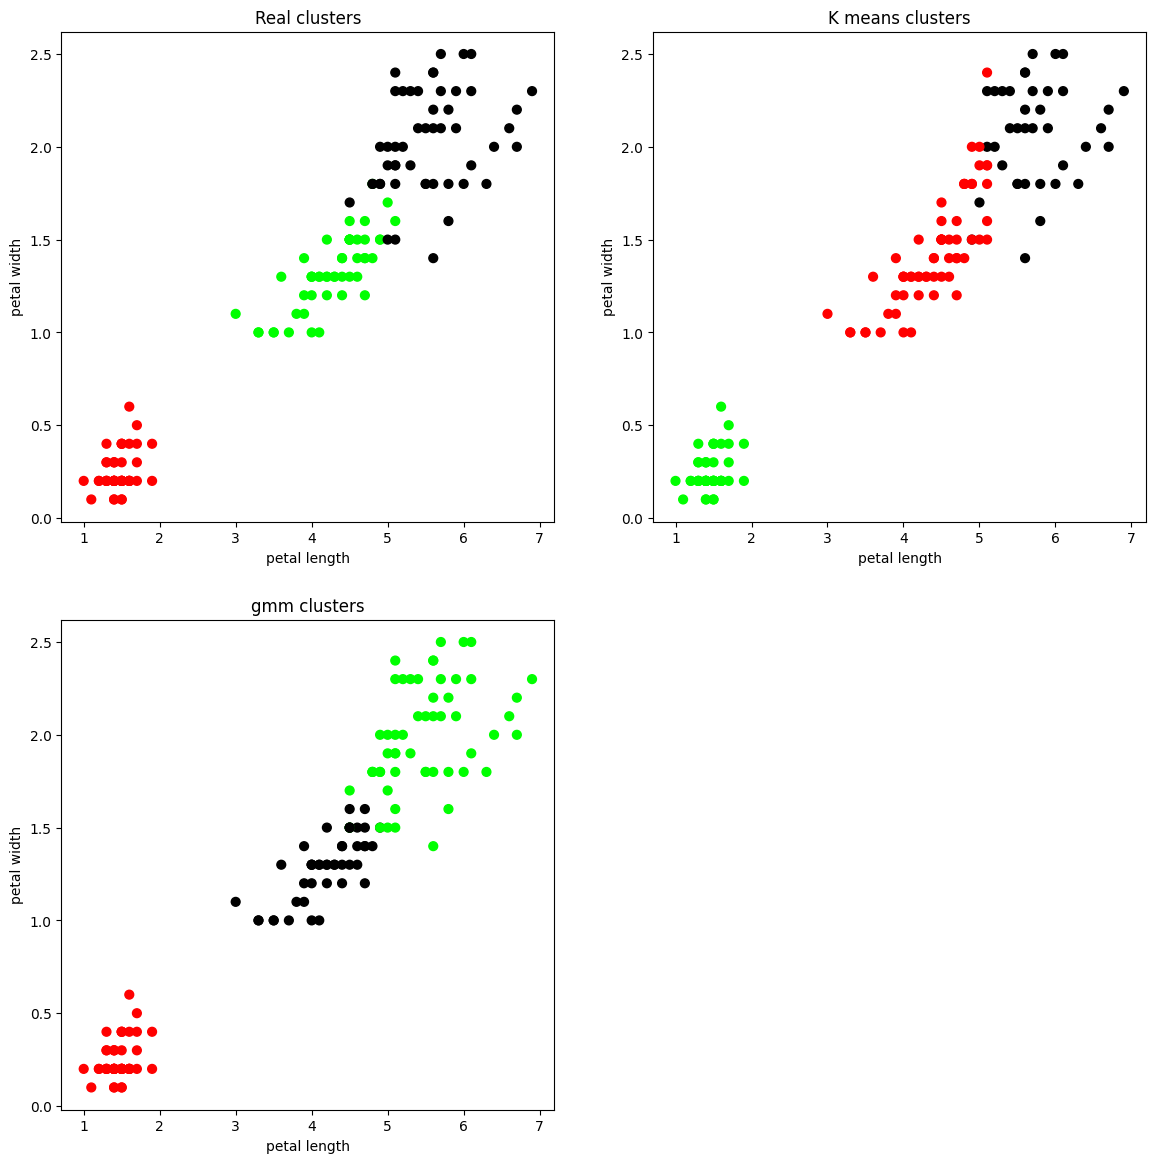

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
iris=datasets.load_iris()
#print(iris)
X=pd.DataFrame(iris.data)
X.columns=['sepal_length','sepal_width','petal_length','petal_width']
y=pd.DataFrame(iris.target)
#print(y)
y.columns=['Targets']
#print("hi",X)
#build k means model
model=KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.petal_length,X.petal_width,c=colormap[y.Targets],s=40)
plt.title("Real clusters")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.subplot(2,2,2)
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_],s=40)
plt.title("K means clusters")
plt.xlabel('petal length')
plt.ylabel('petal width')
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(X.petal_length,X.petal_width,c=colormap[gmm_y],s=40)
plt.title("gmm clusters")
plt.xlabel('petal length')
plt.ylabel('petal width')
print('Observation The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

# **KNN**

In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
data=datasets.load_iris()
#print(data)
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.1)
#print(x_train)
y_train
#print(y_train)
a1=x_train.tolist()
y11=y_train.tolist()
for i in range(0,len(x_train)):
  a1[i].append(y11[i])
b=x_test.tolist()
c=y_test.tolist()
for i in range(0,len(b)):
  b[i].append(c[i])
#print(b)
def calculate_distance(p,q):
  st=0.0
  st=st+math.sqrt(((p[0]-q[0])**2)+((p[1]-q[1])**2)+((p[2]-q[2])**2)+((p[3]-q[3])**2))
  return [st,p[4]]
def classifyknn(a1,b,k):
  min=99999
  z=[]
  for i in range(0,len(a1)):
     fd=calculate_distance(a1[i],b)
     z.append(fd)
  sorted_tuples = sorted(z, key=lambda x:x[0])
  #print("sorted_tuples:",sorted_tuples)
  zc=0
  zo=0
  z2=0
  #print("sorted_tuples:",sorted_tuples)
  #print(type(sorted_tuples[i][1]))
  for j in range(0,k):
    if(sorted_tuples[j][1]==0):
      zc=zc+1
    elif(sorted_tuples[j][1]==1):
      zo=zo+1
    elif (sorted_tuples[j][1]==2):
      z2=z2+1
  if(zc>zo and zc>z2):
     return 0
  elif(zo>zc and zo>z2):
    return 1
  elif(z2>zo and z2>zc):
    return 2
def testing(a1,bt,k):
  ac_label=[]
  test_label=[]
  for i in range(0,len(bt)):
        ste=classifyknn(a1,bt[i],k)
        ac_label.append(bt[i][4])
        test_label.append(ste)
        print("after classifying:",bt[i],"acutallabel:",bt[i][4],"predictedlabel:",ste)
  return ac_label,test_label
acl,tcl=testing(a1,b,7)
from sklearn.metrics import confusion_matrix,classification_report
import sklearn.metrics
print("the acuracy of metrics is :")
sklearn.metrics.accuracy_score(acl,tcl)*100

after classifying: [4.4, 3.0, 1.3, 0.2, 0] acutallabel: 0 predictedlabel: 0
after classifying: [7.4, 2.8, 6.1, 1.9, 2] acutallabel: 2 predictedlabel: 2
after classifying: [7.1, 3.0, 5.9, 2.1, 2] acutallabel: 2 predictedlabel: 2
after classifying: [5.1, 2.5, 3.0, 1.1, 1] acutallabel: 1 predictedlabel: 1
after classifying: [7.7, 3.8, 6.7, 2.2, 2] acutallabel: 2 predictedlabel: 2
after classifying: [6.7, 3.3, 5.7, 2.1, 2] acutallabel: 2 predictedlabel: 2
after classifying: [6.7, 3.0, 5.0, 1.7, 1] acutallabel: 1 predictedlabel: 2
after classifying: [5.1, 3.8, 1.5, 0.3, 0] acutallabel: 0 predictedlabel: 0
after classifying: [5.3, 3.7, 1.5, 0.2, 0] acutallabel: 0 predictedlabel: 0
after classifying: [5.2, 3.5, 1.5, 0.2, 0] acutallabel: 0 predictedlabel: 0
after classifying: [6.0, 2.2, 5.0, 1.5, 2] acutallabel: 2 predictedlabel: 2
after classifying: [5.0, 3.4, 1.5, 0.2, 0] acutallabel: 0 predictedlabel: 0
after classifying: [5.7, 4.4, 1.5, 0.4, 0] acutallabel: 0 predictedlabel: 0
after classi

93.33333333333333

In [ ]:
zx=confusion_matrix(acl,tcl)
zx

array([[3, 0, 0],
       [0, 4, 1],
       [0, 0, 7]])

# **LOCALWEIGHTEDREGRESSION**

244
one [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(244, 2)


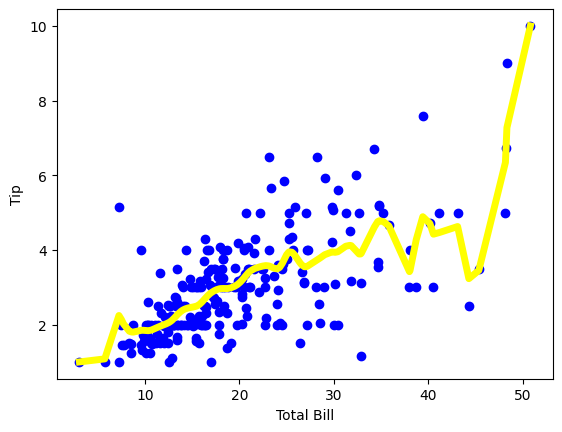

In [ ]:
import matplotlib.pyplot as plt
def kernel (point, xmat, k):
   m,n= np. shape (xmat)
   weights = np.mat(np.eye((m)))
   for j in range(m):
     diff=point-X[j]
     weights[j, j] = np.exp(diff*diff.T/ (-2.0 *k**2))
   return weights
#function to return local weight of eah traiining example
def localweight(point, xmat, ymat, k):
  wt=kernel(point, xmat, k)
  W = (X.T*(wt*X)).I *(X.T*wt*ymat.T)
  return W
#root function that drives the algorithm
def localweightRegression(xmat, ymat, k):
  m,n= np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
     ypred[i] = xmat[i]*localweight(xmat[i], xmat, ymat, k)
  return ypred
data = pd.read_csv('/content/10-dataset.csv')
colA=np.array(data.total_bill)
colB = np.array(data.tip)
mcolA=np.mat(colA)
#print("mcolA",mcolA)
mcolB=np.mat(colB)
m=np.shape(mcolB)[1]
print(m)
one = np.ones((1, m), dtype = int)
print("one",one)
# horizontal stacking
X = np.hstack((one.T,mcolA.T))
print(X.shape)
#print(X)
# predicting values using LWLR
ypred = localweightRegression(X, mcolB, 0.8)
 # plotting the predicted graph
xsort= X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort (0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()